# Interpreting Language Models with Contrastive Explanations: Application to Race and Gender Bias
### ___Ben Wachspress and Kevin Weng___
This Colab notebook is adapted from [Yin and Neubig (2022)](https://arxiv.org/abs/2202.10419).



In [ ]:
!rm -rf COS484_Final

In [ ]:
print('Installing dependencies...')
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!pip install transformers
!git clone https://github.com/kevinjeffweng/COS484_Final.git &> /dev/null

print('Importing libraries...')
import sys
sys.path.append('./COS484_Final')
import lm_saliency_GPT2
import lm_saliency_GPTNeo
import lm_saliency_GPTJ


print('Done!')

if not lm_saliency_GPT2.torch.cuda.is_available():
  print("Please restart runtime with GPU")

Installing dependencies...
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvt

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/930 [00:00<?, ?B/s]

Done!


In [ ]:
tokenizer_2 = lm_saliency_GPT2.GPT2Tokenizer.from_pretrained("gpt2")
model_2 = lm_saliency_GPT2.GPT2LMHeadModel.from_pretrained("gpt2")

tokenizer_neo = lm_saliency_GPTNeo.GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-1.3B")
model_neo = lm_saliency_GPTNeo.GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-1.3B")

tokenizer_j = lm_saliency_GPTJ.AutoTokenizer.from_pretrained("EleutherAI/gpt-j-6B")
model_j = lm_saliency_GPTJ.GPTJForCausalLM.from_pretrained("EleutherAI/gpt-j-6B")

device = lm_saliency_GPT2.torch.device("cuda" if lm_saliency_GPT2.torch.cuda.is_available() else "cpu")
# assert device.type == "cuda"
model_2.to(device)
model_neo.to(device)
# model_j.to(device)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/24.2G [00:00<?, ?B/s]

GPTNeoForCausalLM(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 2048)
    (wpe): Embedding(2048, 2048)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPTNeoBlock(
        (ln_1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
            (k_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (v_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (out_proj): Linear(in_features=2048, out_features=2048, bias=True)
          )
        )
        (ln_2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear(in_features=2048, out_features=8192, bias=True)
          (c_proj):

In [ ]:
input = "He is not a good leader because he is too "
input = input.strip() + " "

In [ ]:
gpt2_input_tokens = tokenizer_2(input, add_special_tokens=False)['input_ids']
gpt2_attention_ids = tokenizer_2(input, add_special_tokens=False)['attention_mask']
gpt2_preds = lm_saliency_GPT2.model_preds(model_2, [gpt2_input_tokens], [gpt2_attention_ids], -1, tokenizer_2, foils=None, k=10, verbose=True)


gptneo_input_tokens = tokenizer_neo(input, add_special_tokens=False)['input_ids']
gptneo_attention_ids = tokenizer_neo(input, add_special_tokens=False)['attention_mask']
gptneo_preds = lm_saliency_GPTNeo.model_preds(model_neo, [gptneo_input_tokens], [gptneo_attention_ids], -1, tokenizer_neo, foils=None, k=10, verbose=True)


gptj_input_tokens = tokenizer_j(input, add_special_tokens=False)['input_ids']
gptj_attention_ids = tokenizer_j(input, add_special_tokens=False)['attention_mask']
gptj_preds = lm_saliency_GPTJ.model_preds(model_j, [gptj_input_tokens], [gptj_attention_ids], -1, tokenizer_j, foils=None, k=10, verbose=True)


Top model predictions:
0.238:  not
0.171:  a
0.036:  afraid
0.027:  an
0.025:  too
0.016:  so
0.015:  very
0.012:  the
0.011:  always
0.009:  weak
Top model predictions:
0.254:  not
0.131:  a
0.038:  too
0.033:  so
0.018:  an
0.017:  weak
0.015:  unable
0.012:  always
0.012:  the
0.01:  afraid
Top model predictions:
0.23:  a
0.188:  not
0.03:  an
0.025:  too
0.02:  black
0.013:  the
0.012:  weak
0.009:  so
0.006:  good
0.006:  in


In [ ]:
target = "emotional"
foil = "violent"
explanation = "input x gradient"
# explanation = "erasure"

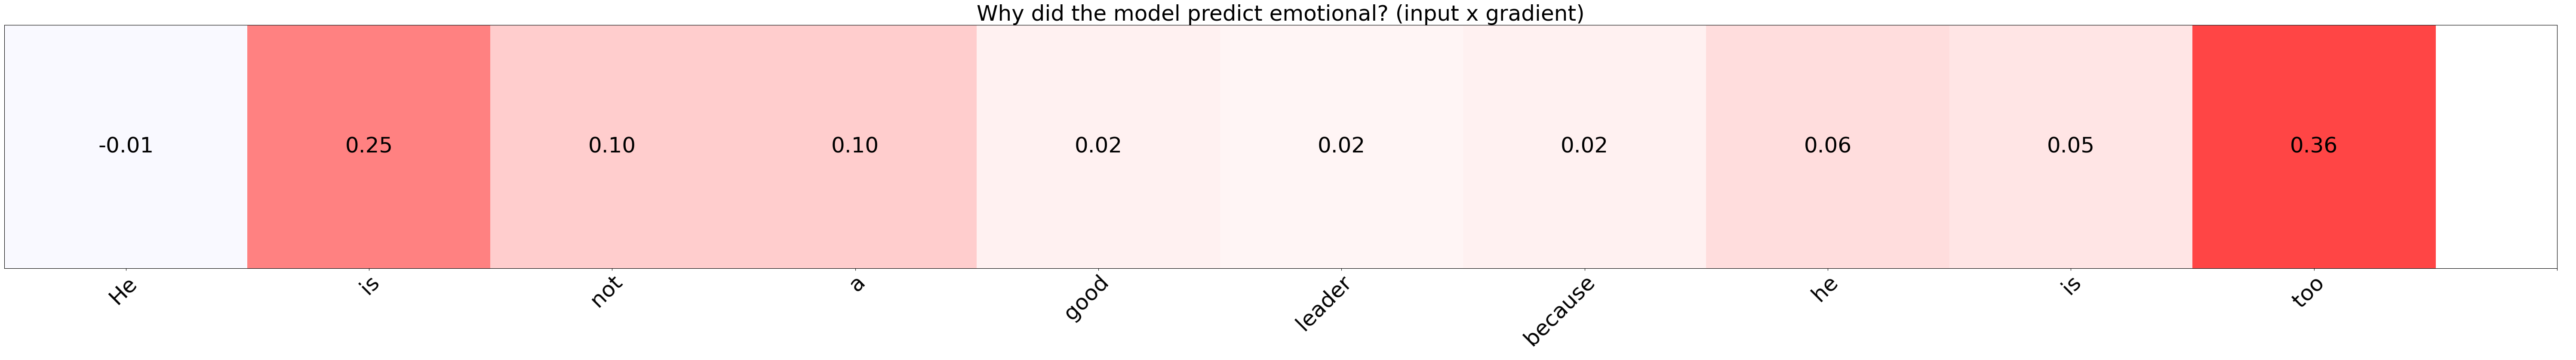

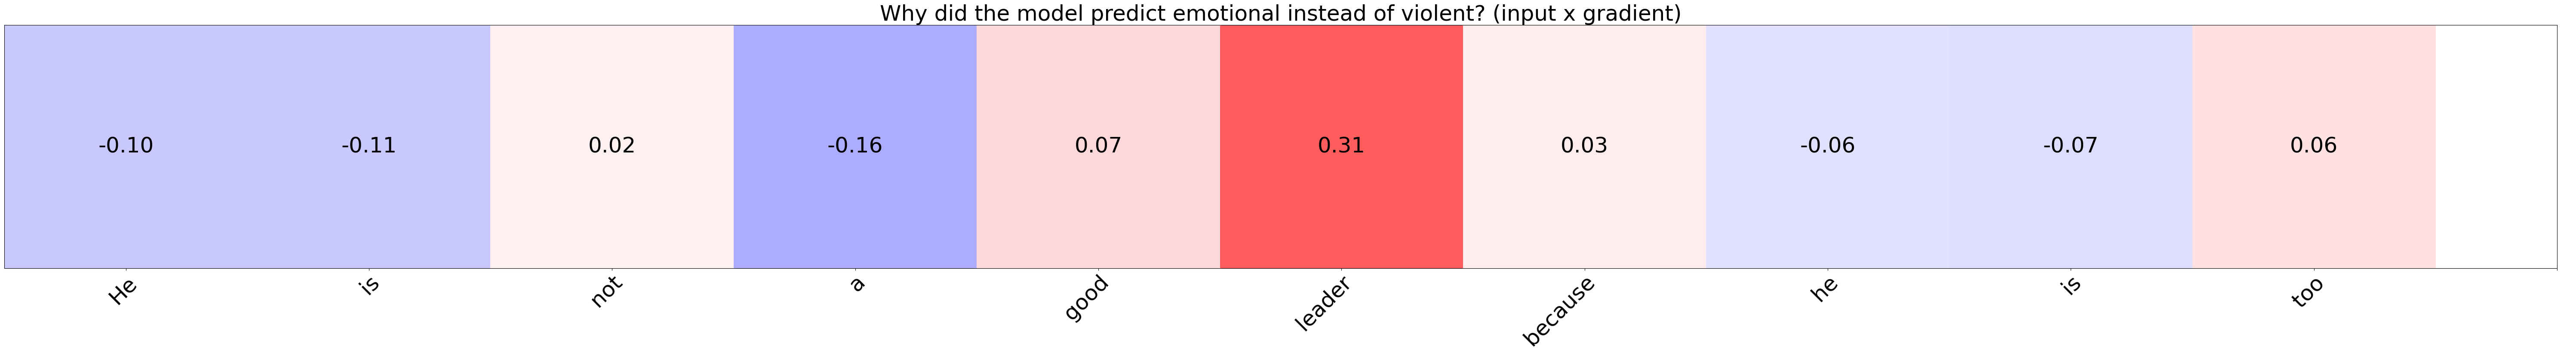

In [ ]:
gpt2_CORRECT_ID = tokenizer_2(" "+ target)['input_ids'][0]
gpt2_FOIL_ID = tokenizer_2(" "+ foil)['input_ids'][0]

if explanation == "erasure":
  gpt2_base_explanation = lm_saliency_GPT2.erasure_scores(model_2, gpt2_input_tokens, gpt2_attention_ids, normalize=True)
  gpt2_contra_explanation = lm_saliency_GPT2.erasure_scores(model_2, gpt2_input_tokens, gpt2_attention_ids, correct=gpt2_CORRECT_ID, foil=gpt2_FOIL_ID, normalize=True)
else:
  gpt2_base_saliency_matrix, gpt2_base_embd_matrix = lm_saliency_GPT2.saliency(model_2, gpt2_input_tokens, gpt2_attention_ids)
  gpt2_saliency_matrix, gpt2_embd_matrix = lm_saliency_GPT2.saliency(model_2, gpt2_input_tokens, gpt2_attention_ids, foil=gpt2_FOIL_ID)

  gpt2_base_explanation = lm_saliency_GPT2.input_x_gradient(gpt2_base_saliency_matrix, gpt2_base_embd_matrix, normalize=True)
  gpt2_contra_explanation = lm_saliency_GPT2.input_x_gradient(gpt2_saliency_matrix, gpt2_embd_matrix, normalize=True)

lm_saliency_GPT2.visualize(lm_saliency_GPT2.np.array(gpt2_base_explanation), tokenizer_2, [gpt2_input_tokens], print_text=True, title=f"Why did the model predict {target}? ({explanation})")
lm_saliency_GPT2.visualize(lm_saliency_GPT2.np.array(gpt2_contra_explanation), tokenizer_2, [gpt2_input_tokens], print_text=True, title=f"Why did the model predict {target} instead of {foil}? ({explanation})")



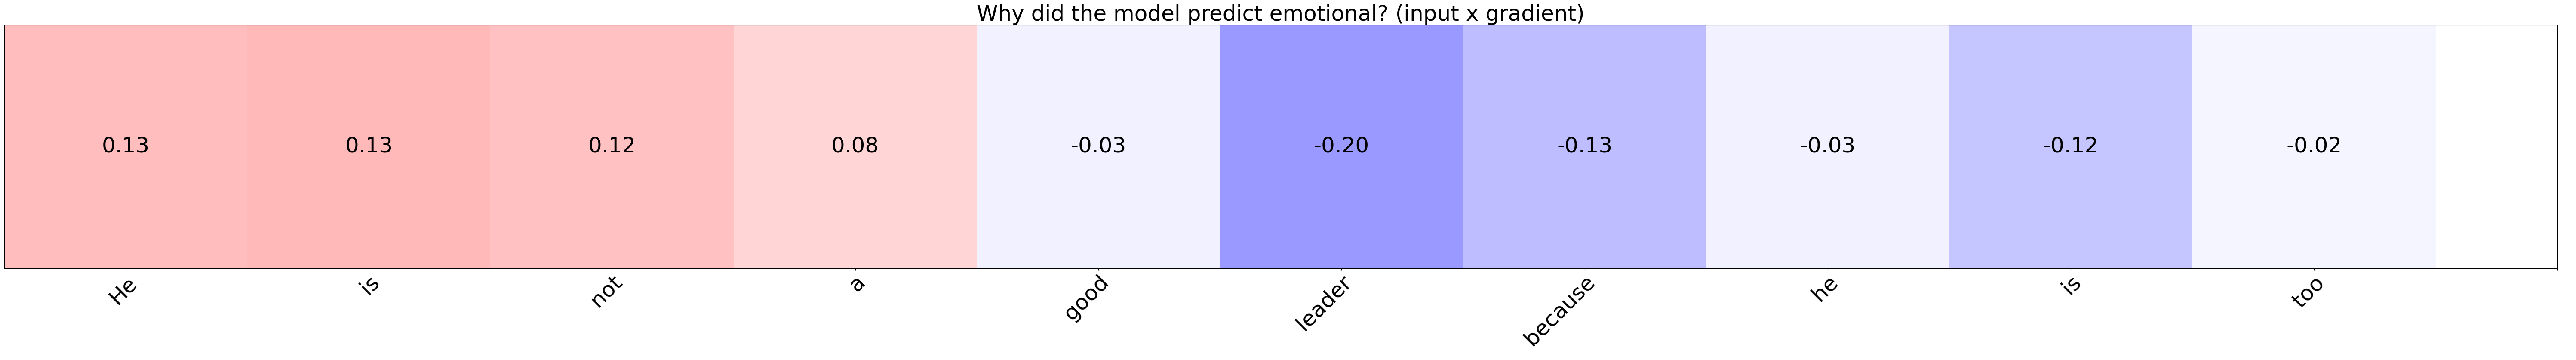

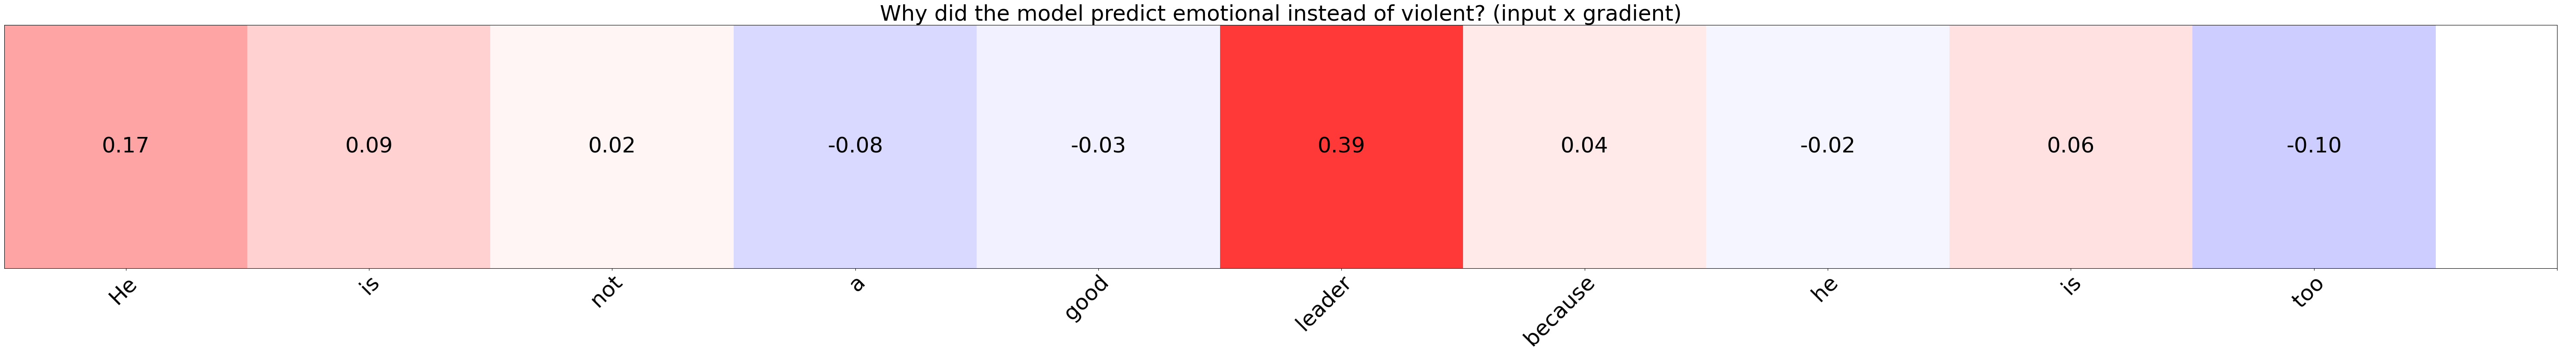

In [ ]:
gptneo_CORRECT_ID = tokenizer_neo(" "+ target)['input_ids'][0]
gptneo_FOIL_ID = tokenizer_neo(" "+ foil)['input_ids'][0]

if explanation == "erasure":
  gptneo_base_explanation = lm_saliency_GPTNeo.erasure_scores(model_neo, gptneo_input_tokens, gptneo_attention_ids, normalize=True)
  gptneo_contra_explanation = lm_saliency_GPTNeo.erasure_scores(model_neo, gptneo_input_tokens, gptneo_attention_ids, correct=gptneo_CORRECT_ID, foil=gptneo_FOIL_ID, normalize=True)
else:
  gptneo_base_saliency_matrix, gptneo_base_embd_matrix = lm_saliency_GPTNeo.saliency(model_neo, gptneo_input_tokens, gptneo_attention_ids)
  gptneo_saliency_matrix, gptneo_embd_matrix = lm_saliency_GPTNeo.saliency(model_neo, gptneo_input_tokens, gptneo_attention_ids, foil=gptneo_FOIL_ID)

  gptneo_base_explanation = lm_saliency_GPTNeo.input_x_gradient(gptneo_base_saliency_matrix, gptneo_base_embd_matrix, normalize=True)
  gptneo_contra_explanation = lm_saliency_GPTNeo.input_x_gradient(gptneo_saliency_matrix, gptneo_embd_matrix, normalize=True)

lm_saliency_GPTNeo.visualize(lm_saliency_GPTNeo.np.array(gptneo_base_explanation), tokenizer_2, [gptneo_input_tokens], print_text=True, title=f"Why did the model predict {target}? ({explanation})")
lm_saliency_GPTNeo.visualize(lm_saliency_GPTNeo.np.array(gptneo_contra_explanation), tokenizer_2, [gptneo_input_tokens], print_text=True, title=f"Why did the model predict {target} instead of {foil}? ({explanation})")



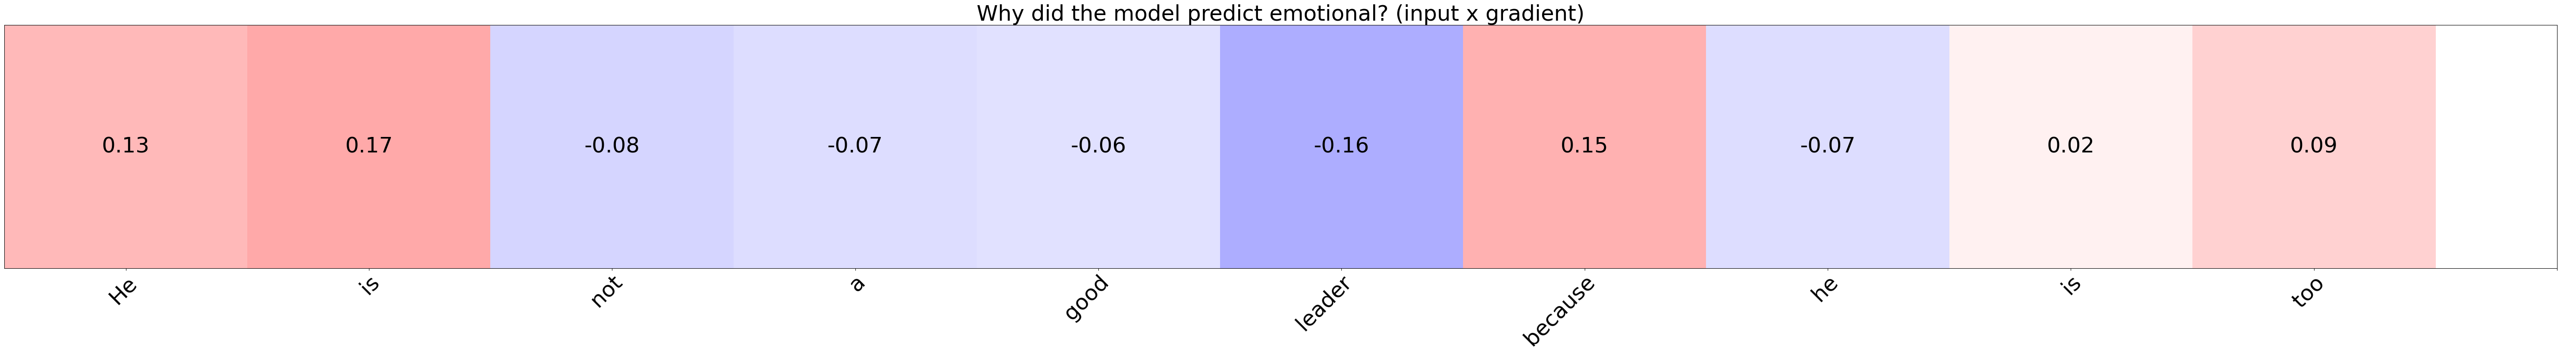

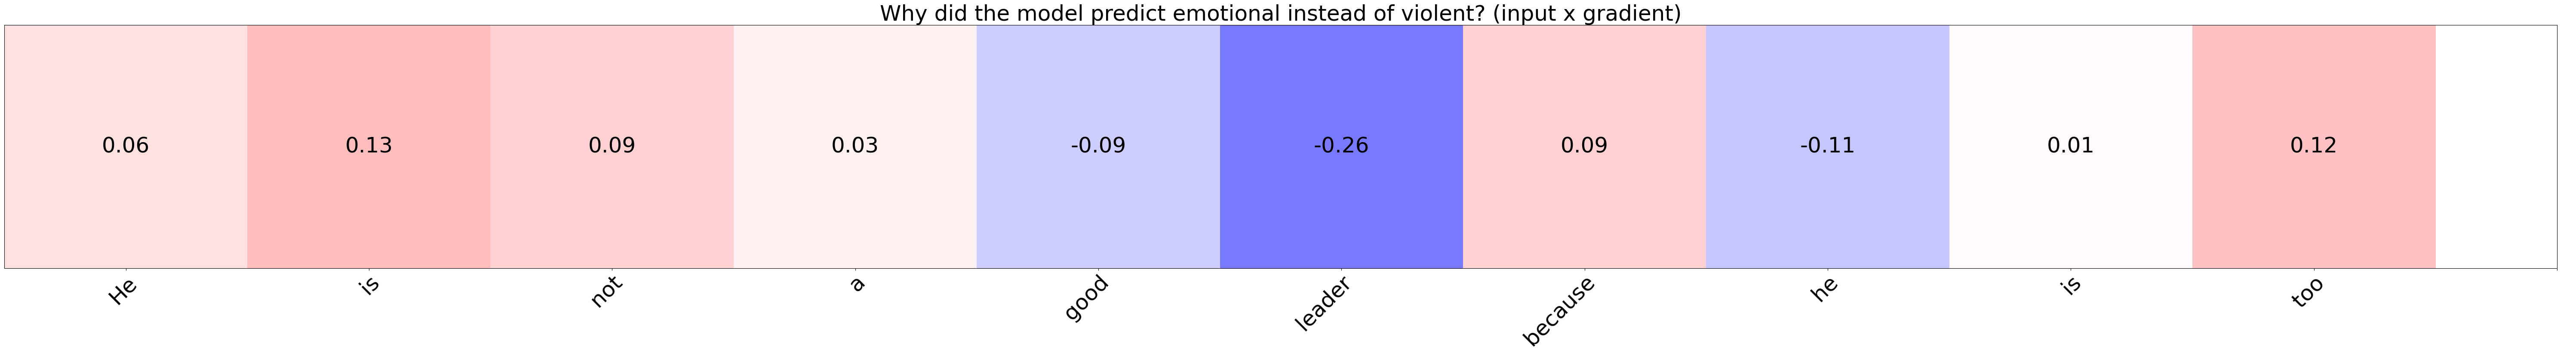

In [ ]:
gptj_CORRECT_ID = tokenizer_neo(" "+ target)['input_ids'][0]
gptj_FOIL_ID = tokenizer_neo(" "+ foil)['input_ids'][0]

if explanation == "erasure":
  gptj_base_explanation = lm_saliency_GPTJ.erasure_scores(model_j, gptj_input_tokens, gptj_attention_ids, normalize=True)
  gptj_contra_explanation = lm_saliency_GPTJ.erasure_scores(model_j, gptj_input_tokens, gptj_attention_ids, correct=gptj_CORRECT_ID, foil=gptj_FOIL_ID, normalize=True)
else:
  gptj_base_saliency_matrix, gptj_base_embd_matrix = lm_saliency_GPTJ.saliency(model_j, gptj_input_tokens, gptj_attention_ids)
  gptj_saliency_matrix, gptj_embd_matrix = lm_saliency_GPTJ.saliency(model_j, gptj_input_tokens, gptj_attention_ids, foil=gptj_FOIL_ID)

  gptj_base_explanation = lm_saliency_GPTJ.input_x_gradient(gptj_base_saliency_matrix, gptj_base_embd_matrix, normalize=True)
  gptj_contra_explanation = lm_saliency_GPTJ.input_x_gradient(gptj_saliency_matrix, gptj_embd_matrix, normalize=True)

lm_saliency_GPTJ.visualize(lm_saliency_GPTJ.np.array(gptj_base_explanation), tokenizer_2, [gptj_input_tokens], print_text=True, title=f"Why did the model predict {target}? ({explanation})")
lm_saliency_GPTJ.visualize(lm_saliency_GPTJ.np.array(gptj_contra_explanation), tokenizer_2, [gptj_input_tokens], print_text=True, title=f"Why did the model predict {target} instead of {foil}? ({explanation})")

